In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

col_names = ['Index','Angle','Disp','Force','Front','Right','Left','TimeS1','TimeS2']
root_dir = "/home/andy/Documents/Wichita_bumper/ABT/"
xls_0 = root_dir + "ABT 2018-09-24 15_48 baffle_none spring_P5C 11angle.xlsx"
xls_1 = root_dir + "ABT 2018-09-24 17_46 baffle_P5A spring_P5C 11angle.xlsx"
xls_2 = root_dir + "ABT 2018-10-01 15_34 baffle_P5B spring_P5C 11angle.xlsx"
xls_3 = root_dir + "ABT 2018-10-01 16_15 baffle_P5B, 4cut spring_P5C 11angle.xlsx"
xls_4 = root_dir + "ABT 2018-10-02 19_07 baffle_P5B spring_P5C 11angle, full speed.xlsx"
xls_5 = root_dir + "ABT 2018-10-03 10_27 baffle_none spring_P5C 11angle, full speed.xlsx"
df_NoBaffle = pd.read_excel(xls_0,'AllData',header=1,names=col_names)
df_P5A = pd.read_excel(xls_1,'AllData',header=1,names=col_names)
df_P5B = pd.read_excel(xls_2,'AllData',header=1,names=col_names)
df_P5C = pd.read_excel(xls_3,'AllData',header=1,names=col_names)
df_P5C_fast = pd.read_excel(xls_4, 'AllData',header=1,names=col_names)
df_P5C1_fast = pd.read_excel(xls_5, 'AllData',header=1,names=col_names)

Ps_list = [df_NoBaffle,df_P5A,df_P5B,df_P5C,df_P5C_fast, df_P5C1_fast]
df_list = ["Baseline","Compression Molded Baffle (w/ P5C Springs)",\
           'Extruded Baffle (w/ P5C Springs)','Cut extruded baffle (w/ P5C Springs)',\
           'Cut Extruded Baffle (w/ P5C Springs)\nMax Travel Speed',\
           'No Baffle (w/ P5C Springs)\nMax Travel Speed']

angles = []
for value in df_NoBaffle['Angle']:
    if value not in angles:
        angles.append(value)
    else:
        continue
        
angle = angles[0]
force_thresh = 0.01 #Newtons
df_0 = df_NoBaffle[df_NoBaffle['Angle']==angle]
df_0_red = df_0[df_0['Force']>force_thresh]

'''
#plot force/displacement
fig,ax = plt.subplots(figsize = (16,8))
ax.set_facecolor('#f6f6f6')
df_0_red.plot(x='Disp',y='Force',ax=ax)
ax.grid(1)
ax.set_ylabel("Force (N)")
ax.set_xlabel("Displacement (mm)")
ax.set_ylim(-0.5,10)
'''

'\n#plot force/displacement\nfig,ax = plt.subplots(figsize = (16,8))\nax.set_facecolor(\'#f6f6f6\')\ndf_0_red.plot(x=\'Disp\',y=\'Force\',ax=ax)\nax.grid(1)\nax.set_ylabel("Force (N)")\nax.set_xlabel("Displacement (mm)")\nax.set_ylim(-0.5,10)\n'

In [3]:
print "Angles Tested"
print angles

Angles Tested
[-110, -88, -66, -44, -22, 0, 22, 44, 66, 88, 110]


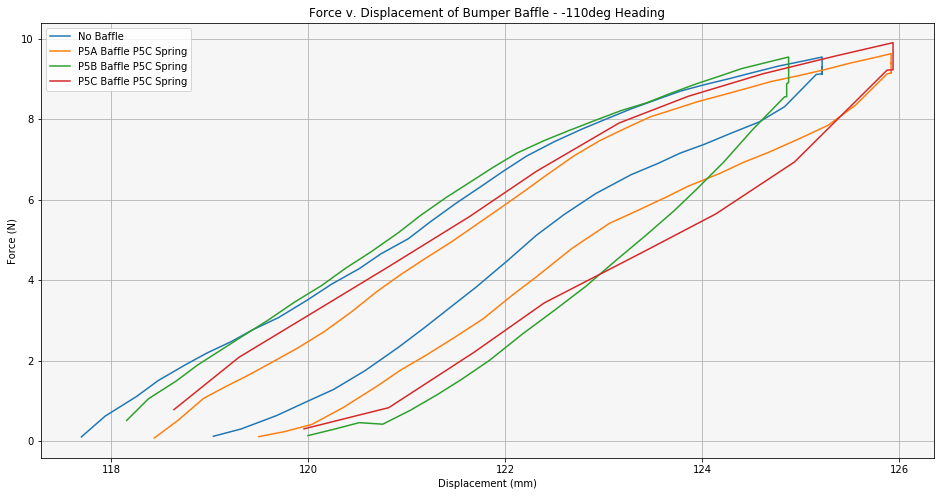

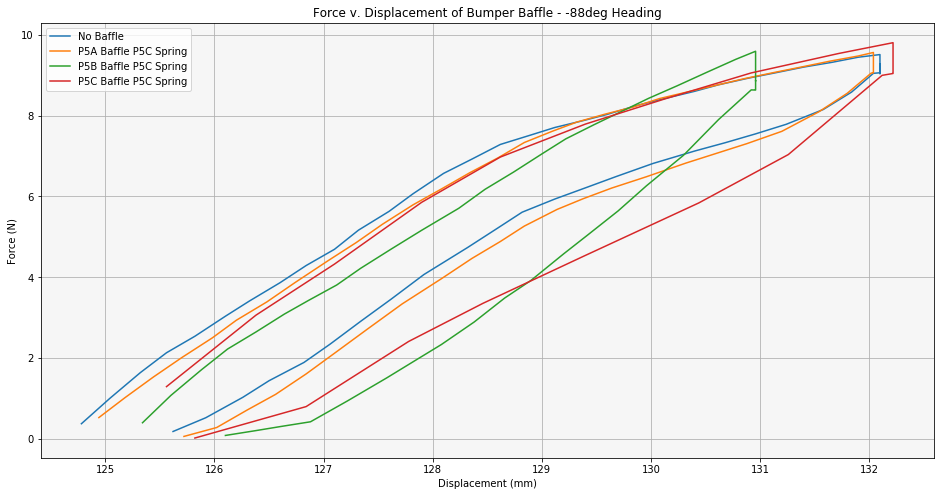

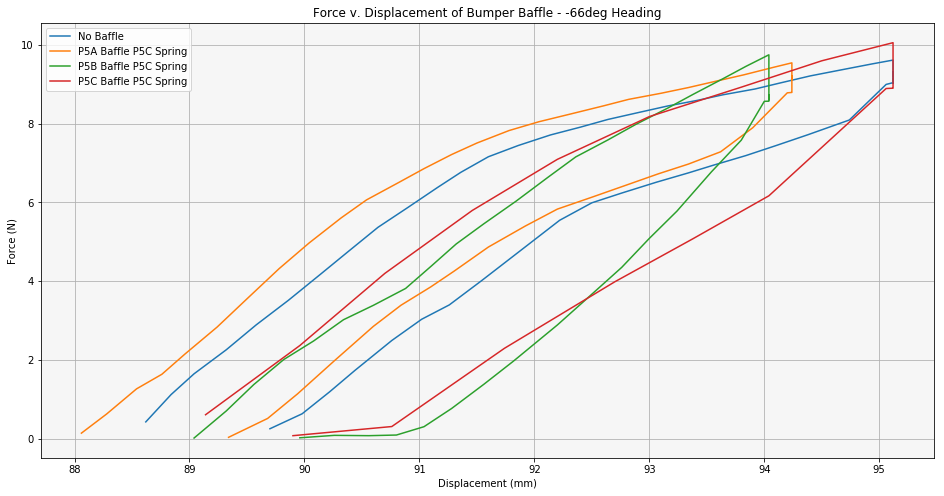

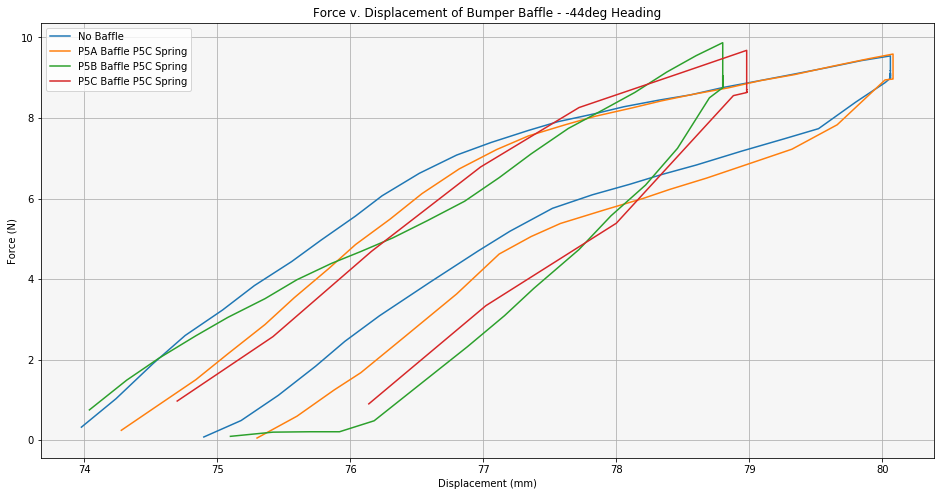

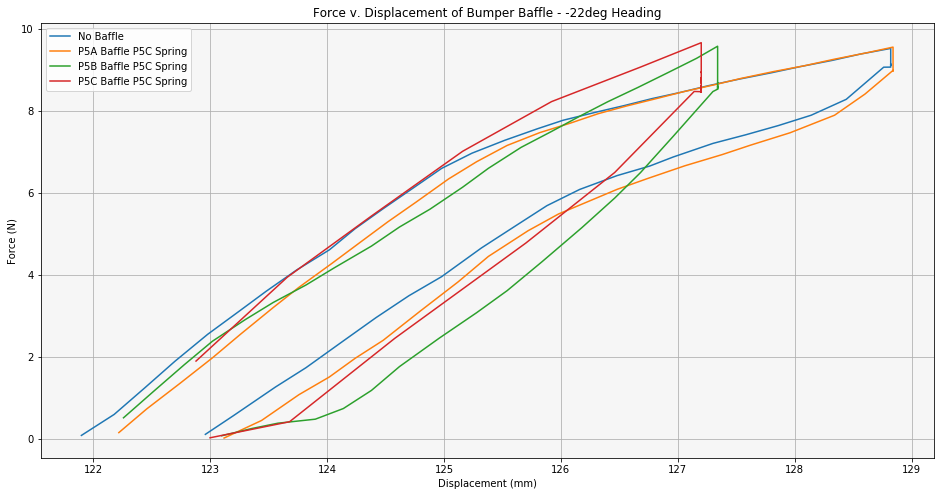

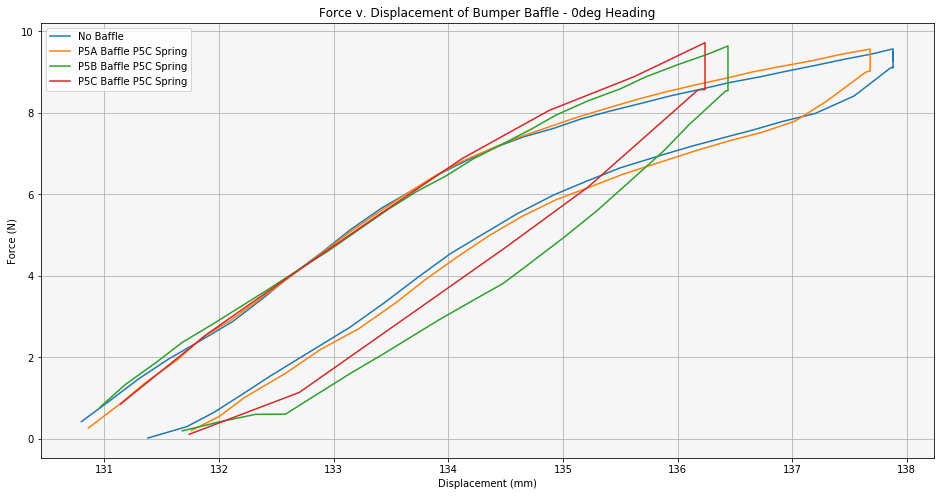

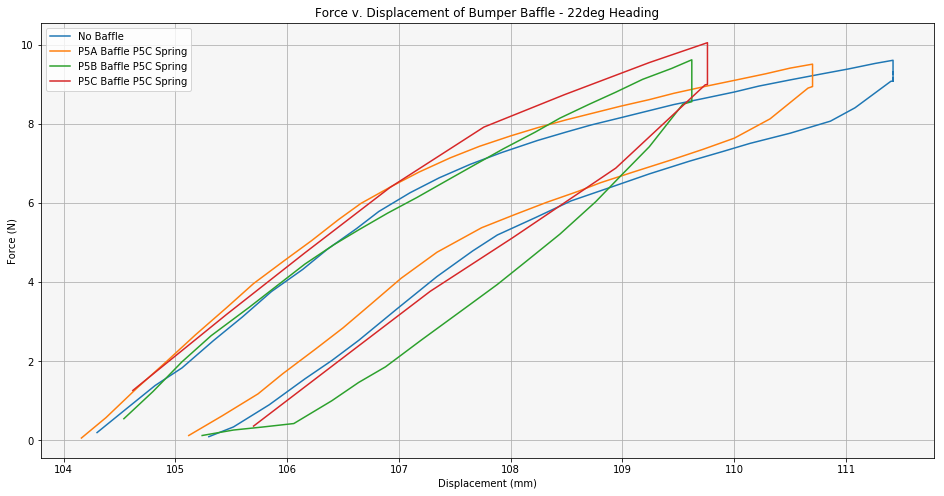

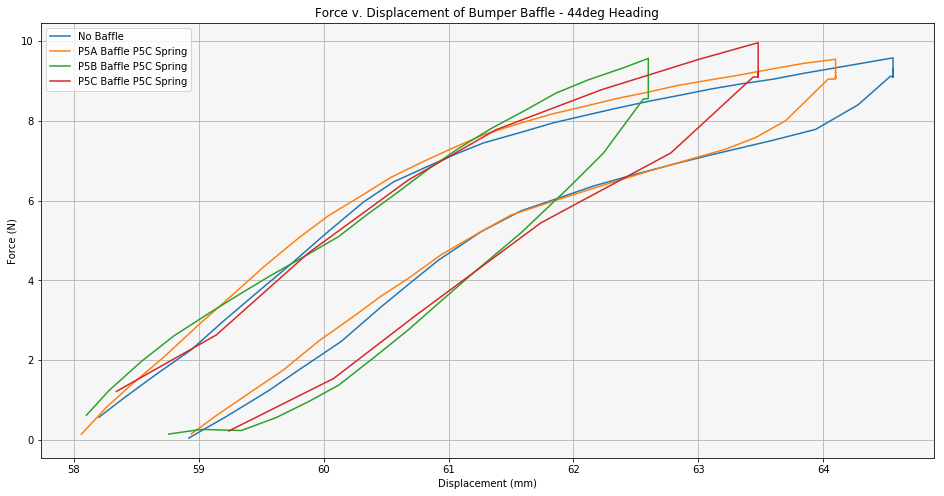

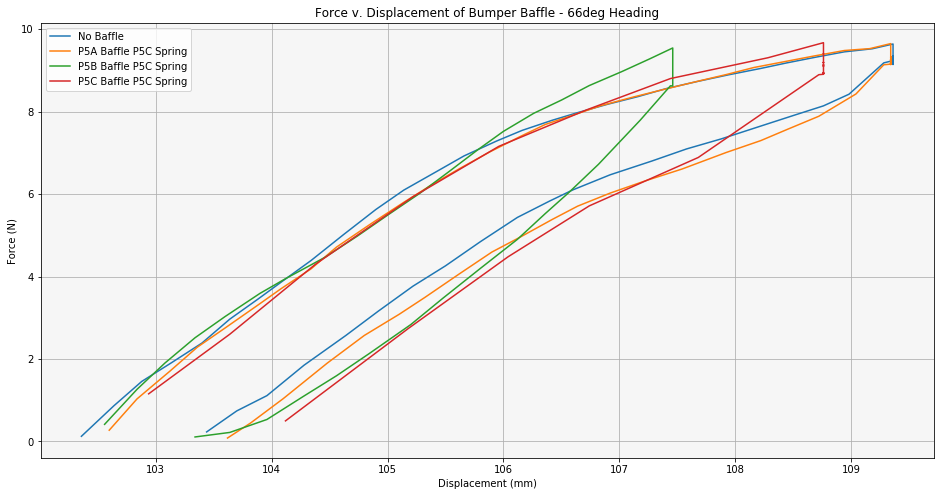

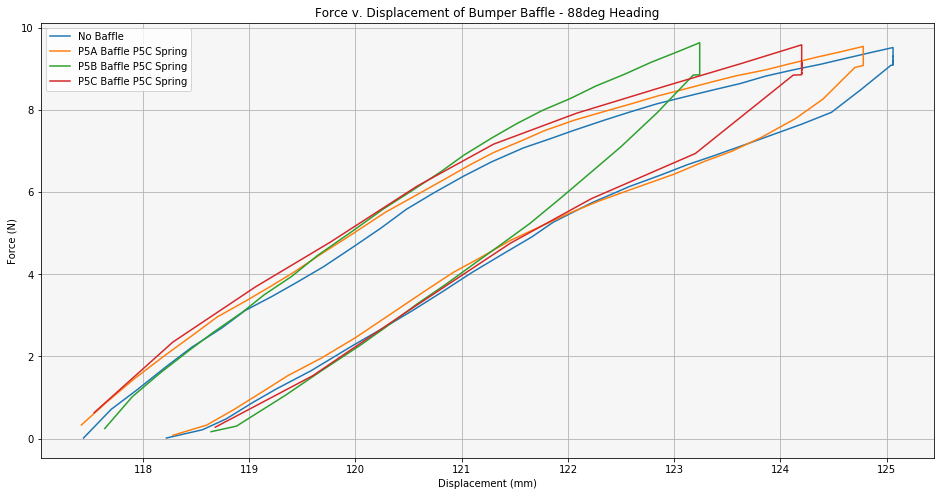

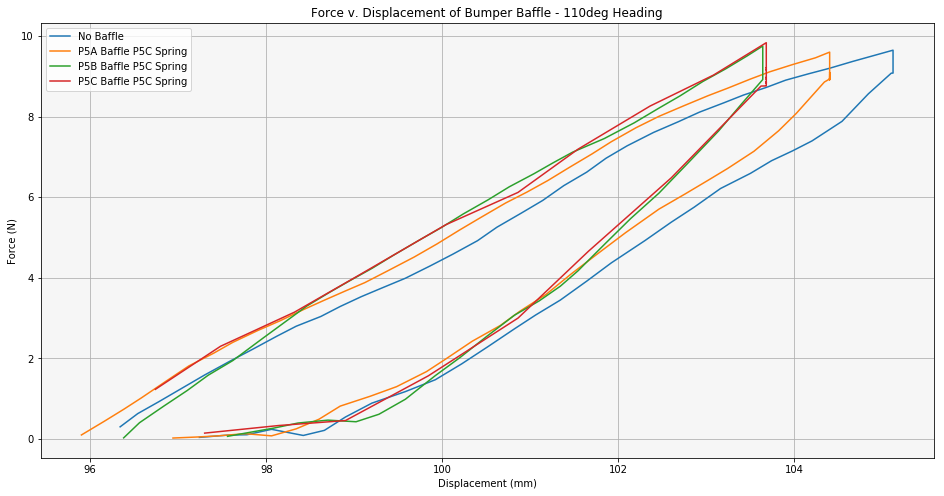

In [4]:
#collect values given a heading from all dataframes
for angle in angles:
    heading = angle
    force_thresh = 0.01
    fig,ax = plt.subplots(figsize = (16,8))
    ax.set_facecolor('#f6f6f6')

    for df in Ps_list[0:4]: 
        df_sub = df[df['Angle']== heading]
        df_sub = df_sub[df_sub['Force']>force_thresh]
        df_sub.plot(ax=ax,x='Disp',y='Force')
        ax.grid(1)
        ax.set_ylabel('Force (N)')
        ax.set_xlabel('Displacement (mm)')
        ax.set_title('Force v. Displacement of Bumper Baffle - %sdeg Heading'%heading)
        ax.legend(['No Baffle','P5A Baffle P5C Spring','P5B Baffle P5C Spring','P5C Baffle P5C Spring','P5C Fast'\
                  'P5C Fast No Baffle'])
    

Baseline


/home/andy/.pyenv/versions/anaconda2-5.3.0/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Compression Molded Baffle (w/ P5C Springs)
Extruded Baffle (w/ P5C Springs)
Cut extruded baffle (w/ P5C Springs)
Cut Extruded Baffle (w/ P5C Springs)
Max Travel Speed
No Baffle (w/ P5C Springs)
Max Travel Speed


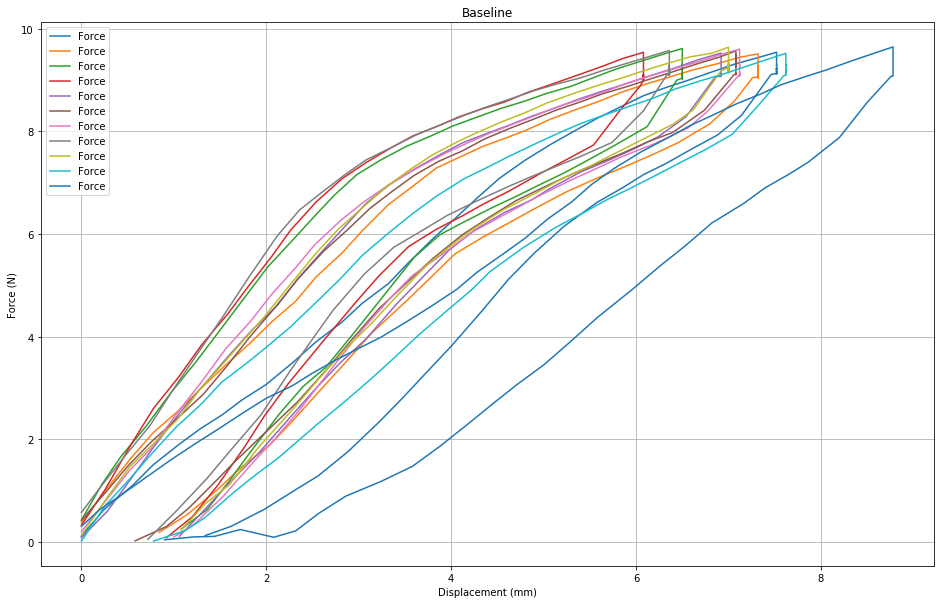

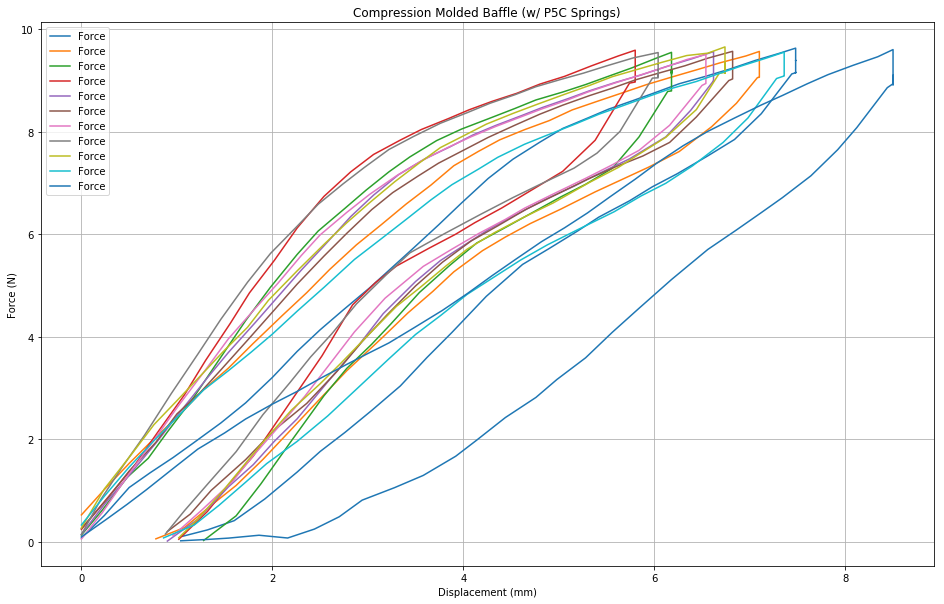

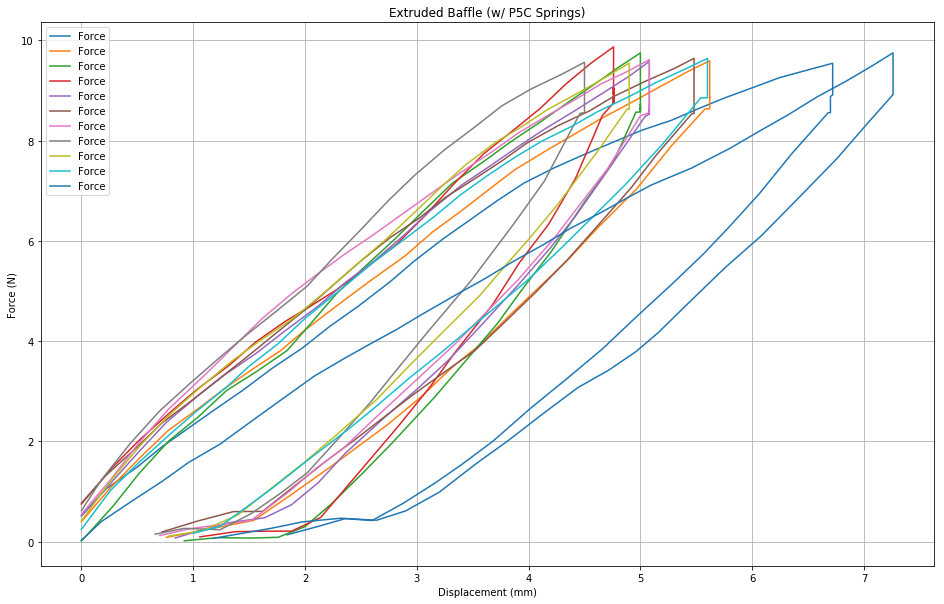

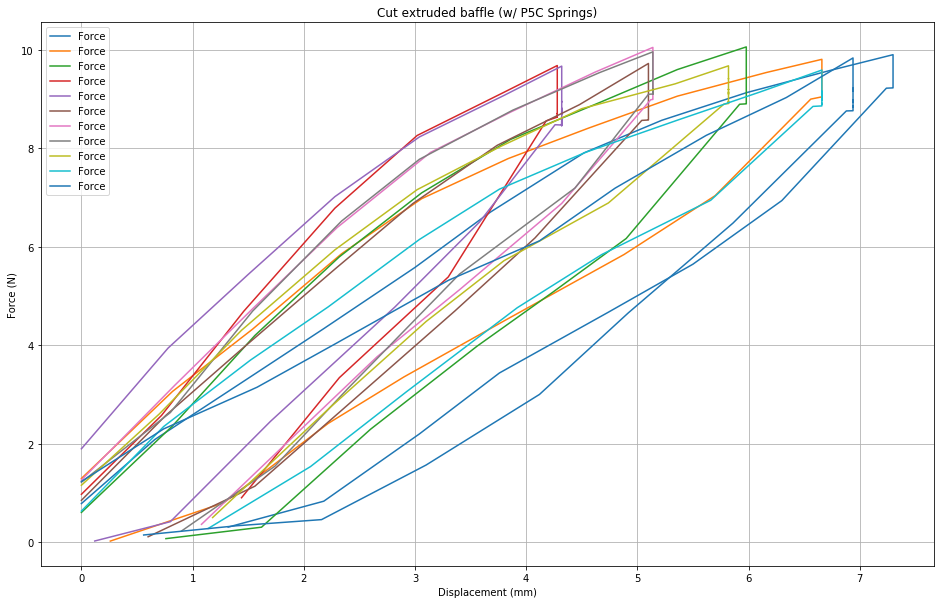

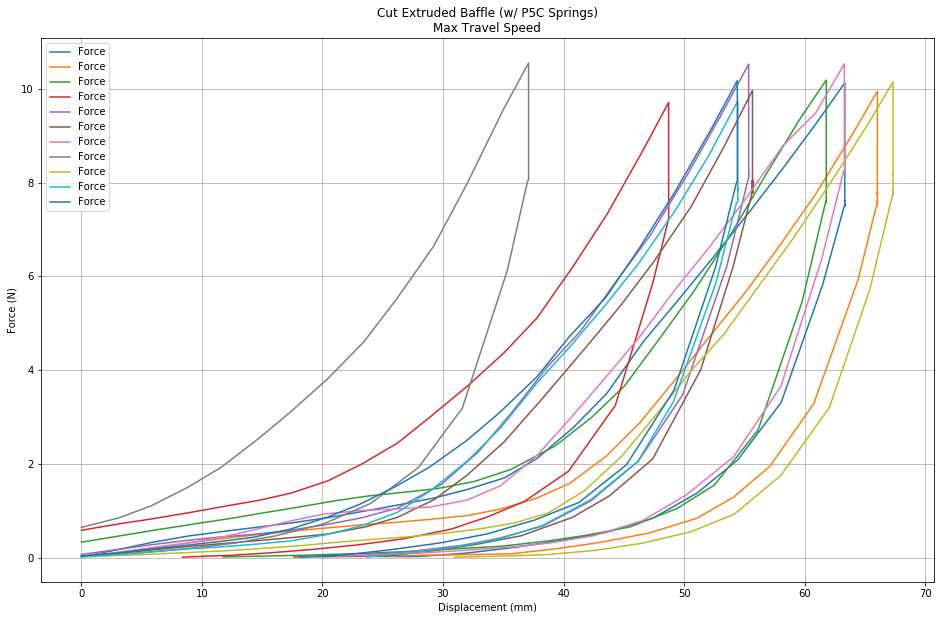

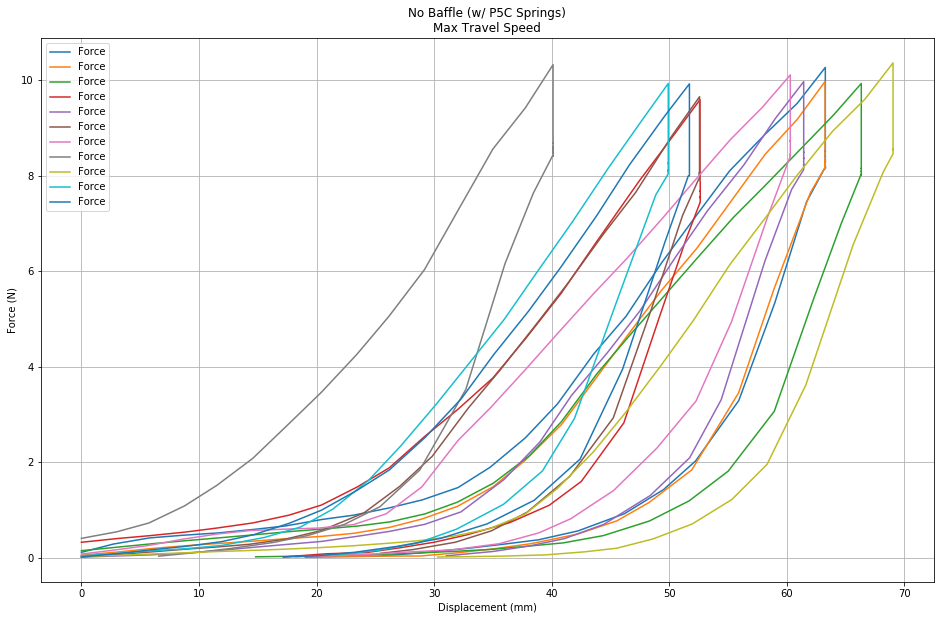

In [5]:
for counter,df in enumerate(Ps_list):
    title = df_list[counter]
    print title
    df_in = df.iloc[:,:4]
    df_in = df_in[df_in['Force']>0.01]

    fig,ax = plt.subplots(figsize=(16,10))
    zero_Dict= {}
    for angle in angles:    
        df_anglesub = df_in[df_in['Angle']==angle]
        zero = float(df_anglesub.Disp.min())
        zero_Dict[angle] = zero
        #print "Angle: %i"%angle
        #print "Disp Zero: %f"%zero
        df_anglesub['Disp'] = np.where(df_anglesub['Angle'] == angle,df_anglesub['Disp']-zero_Dict[angle],df_anglesub.Disp)
        df_anglesub.plot(ax =ax,x='Disp',y='Force')
        ax.grid(1)
        ax.set_xlabel('Displacement (mm)')
        ax.set_ylabel('Force (N)')
        #ax.legend(angles)
        plt.title(title)

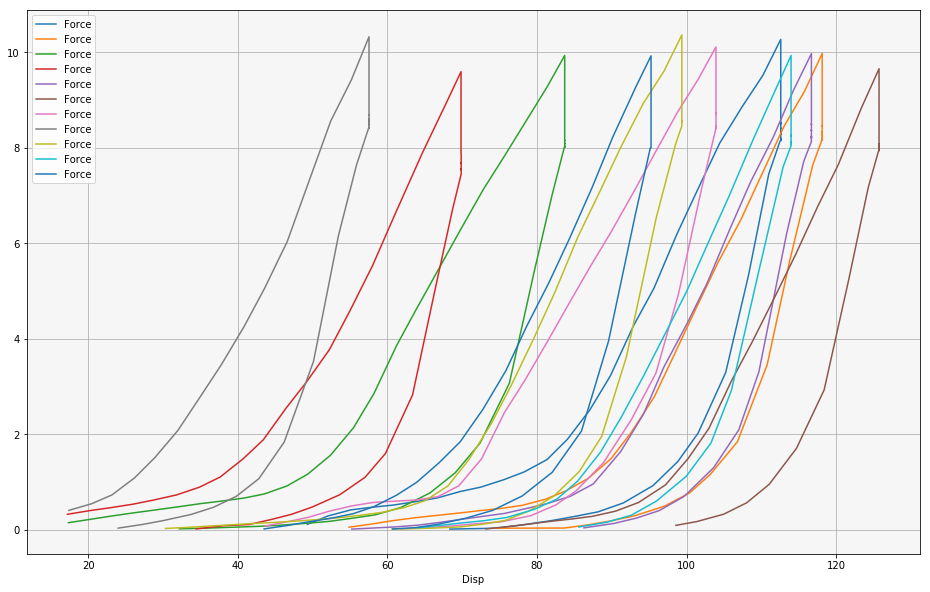

In [6]:
def trim_and_plot(df_in):
    df = df_in.loc[:,('Force','Disp','Angle')]
    force_thresh = 0.01 #N
    valid_ind = []
    valid_data = []
    #identify rows w/ force gauge in contact
    for counter,value in enumerate(df['Force']):
        if value > force_thresh:
            valid_ind.append(counter)
            valid_data.append([counter,value])
    #subset dataframe w/ only <0 vals        
    df_sub = df.iloc[valid_ind,:]

    #plot force/displacement
    fig,ax = plt.subplots(figsize = (16,10))
    ax.set_facecolor('#f6f6f6')
    df_sub.groupby('Angle').plot(ax=ax,x='Disp',y='Force')
    ax.grid(1)
    
trim_and_plot(Ps_list[5])